In [1]:
import numpy as np
import matplotlib.pyplot as plt
from flux.shape import CgalTrimeshShapeModel, get_surface_normals

import pyvista as pv

# Temperature Spinup Computation

Spin up the thermal model by running multiple lunar cycles with the uncompressed form factor matrix. This notebook compares the sequential cycles to see if the thermal model is converging. More than 10 cycles are likely needed, however.

In [ ]:
mesh_dir = 'python-flux/examples/shackleton_vary_outer/'
mesh_name = 'shackleton'

In [3]:
V = np.load(f'{mesh_dir}/{mesh_name}_verts_2.5_80.npy')
F = np.load(f'{mesh_dir}/{mesh_name}_faces_2.5_80.npy')

# convert verts from km to m
V *= 1e3

N = get_surface_normals(V, F)
N[N[:, 2] > 0] *= -1

faces_padded = np.concatenate([3*np.ones(F.shape[0],dtype=int).reshape(-1,1), F], axis=1)

shape_model = CgalTrimeshShapeModel(V, F, N)
F.shape

(13288, 3)

Load the temperature profiles for the triangular mesh at the beginning of each cycle using the uncompressed form factor matrix.

In [38]:
path = f'{mesh_dir}/results/true_2.5_80/T_frames_long'
T_frames_true = []
for i in range(11):
    T_frames_true.append(np.load(path+"/T{:03d}.npy".format(2880*i)))
T_frames_true = np.array(T_frames_true)
T_frames_true.shape

(11, 13288, 61)

In [57]:
cycle = 10
layer = 0

grid = pv.PolyData(V, faces=faces_padded.flatten(), n_faces=F.shape[0])

grid['Temp (Full FF)'] = np.empty(F.shape[0])
grid['Temp (Full FF)'][...] = T_frames_true[cycle,:,layer]
grid.plot()

Widget(value="<iframe src='http://localhost:61859/index.html?ui=P_0x24e82a4c340_4&reconnect=auto' style='width…

Compute and plot the relative difference in temperature between subsequent cycles. First, plot the relative difference across all layers, and then plot specific layers.

In [39]:
T_frames_true_diffs_field = []
for i in range(T_frames_true.shape[0]-1):
    T_frames_true_diffs_field.append(abs(T_frames_true[i+1] - T_frames_true[i]) / T_frames_true[i])
T_frames_true_diffs_field = np.array(T_frames_true_diffs_field)
T_frames_true_diffs_field.shape

(10, 13288, 61)

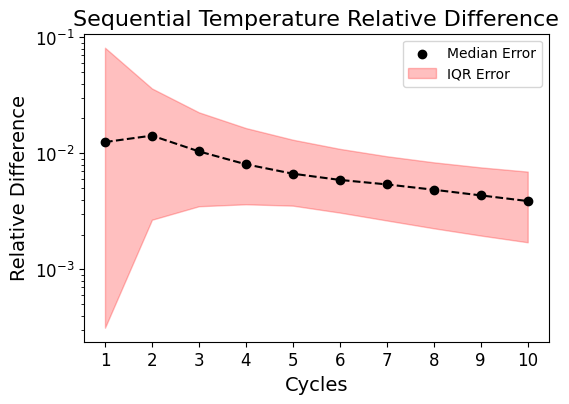

In [48]:
first_quartile_errs= np.quantile(T_frames_true_diffs_field, 0.25, axis=(1,2))
median_errs= np.quantile(T_frames_true_diffs_field, 0.5, axis=(1,2))
third_quartile_errs= np.quantile(T_frames_true_diffs_field, 0.75, axis=(1,2))


plt.figure(figsize=(6,4))
plt.scatter(np.arange(1,T_frames_true.shape[0]), median_errs, c='k', zorder=3, label='Median Error')
plt.plot(np.arange(1,T_frames_true.shape[0]), median_errs, c='k', ls='--', zorder=3)

plt.fill_between(np.arange(1,T_frames_true.shape[0]),
                 first_quartile_errs, third_quartile_errs, color='r', alpha=0.25, label='IQR Error')

plt.xticks(np.arange(1,T_frames_true.shape[0]), fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Cycles", fontsize=14)
plt.ylabel("Relative Difference", fontsize=14)
plt.title("Sequential Temperature Relative Difference", fontsize=16)
plt.yscale('log')
plt.legend()
plt.show()

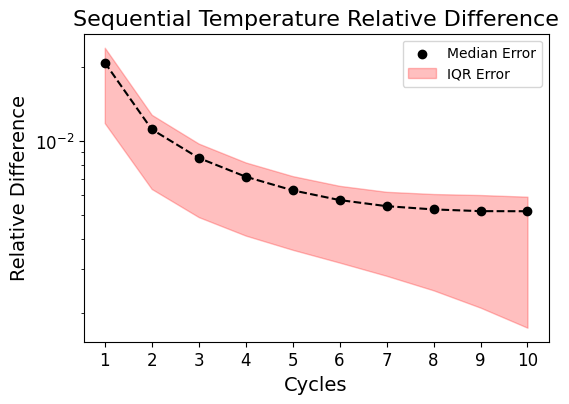

In [49]:
layer = 60

first_quartile_errs= np.quantile(T_frames_true_diffs_field[:,:,layer], 0.25, axis=1)
median_errs= np.quantile(T_frames_true_diffs_field[:,:,layer], 0.5, axis=1)
third_quartile_errs= np.quantile(T_frames_true_diffs_field[:,:,layer], 0.75, axis=1)


plt.figure(figsize=(6,4))
plt.scatter(np.arange(1,T_frames_true.shape[0]), median_errs, c='k', zorder=3, label='Median Error')
plt.plot(np.arange(1,T_frames_true.shape[0]), median_errs, c='k', ls='--', zorder=3)

plt.fill_between(np.arange(1,T_frames_true.shape[0]),
                 first_quartile_errs, third_quartile_errs, color='r', alpha=0.25, label='IQR Error')

plt.xticks(np.arange(1,T_frames_true.shape[0]), fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Cycles", fontsize=14)
plt.ylabel("Relative Difference", fontsize=14)
plt.title("Sequential Temperature Relative Difference", fontsize=16)
plt.yscale('log')
plt.legend()
plt.show()

Create similar plots for the absolute difference in temperature between subsequent cycles.

In [42]:
T_frames_true_abs_diffs_field = []
for i in range(T_frames_true.shape[0]-1):
    T_frames_true_abs_diffs_field.append(abs(T_frames_true[i+1] - T_frames_true[i]))
T_frames_true_abs_diffs_field = np.array(T_frames_true_abs_diffs_field)
T_frames_true_abs_diffs_field.shape

(10, 13288, 61)

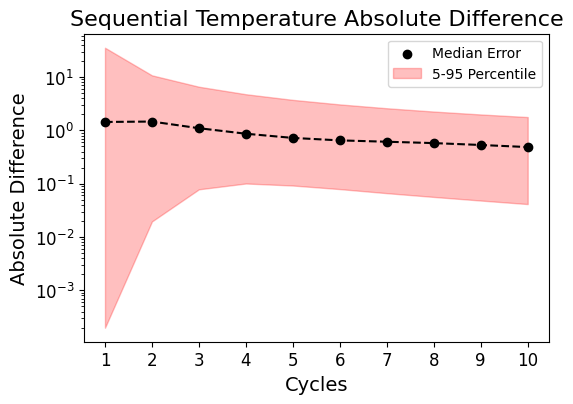

In [47]:
first_quartile_errs= np.quantile(T_frames_true_abs_diffs_field, 0.05, axis=(1,2))
median_errs= np.quantile(T_frames_true_abs_diffs_field, 0.5, axis=(1,2))
third_quartile_errs= np.quantile(T_frames_true_abs_diffs_field, 0.95, axis=(1,2))


plt.figure(figsize=(6,4))
plt.scatter(np.arange(1,T_frames_true.shape[0]), median_errs, c='k', zorder=3, label='Median Error')
plt.plot(np.arange(1,T_frames_true.shape[0]), median_errs, c='k', ls='--', zorder=3)

plt.fill_between(np.arange(1,T_frames_true.shape[0]),
                 first_quartile_errs, third_quartile_errs, color='r', alpha=0.25, label='5-95 Percentile')

plt.xticks(np.arange(1,T_frames_true.shape[0]), fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Cycles", fontsize=14)
plt.ylabel("Absolute Difference", fontsize=14)
plt.title("Sequential Temperature Absolute Difference", fontsize=16)
plt.yscale('log')
plt.legend()
plt.show()

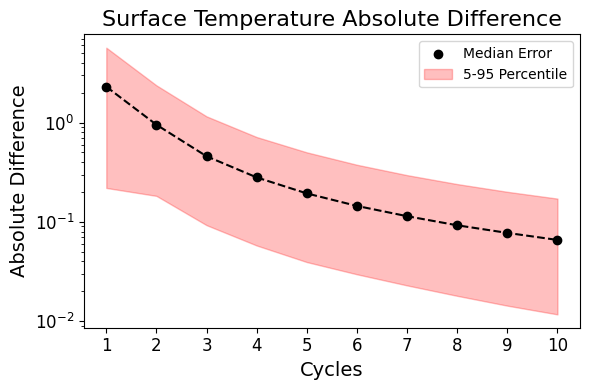

In [55]:
layer = 0

first_quartile_errs= np.quantile(T_frames_true_abs_diffs_field[:,:,layer], 0.05, axis=1)
median_errs= np.quantile(T_frames_true_abs_diffs_field[:,:,layer], 0.5, axis=1)
third_quartile_errs= np.quantile(T_frames_true_abs_diffs_field[:,:,layer], 0.95, axis=1)


plt.figure(figsize=(6,4))
plt.scatter(np.arange(1,T_frames_true.shape[0]), median_errs, c='k', zorder=3, label='Median Error')
plt.plot(np.arange(1,T_frames_true.shape[0]), median_errs, c='k', ls='--', zorder=3)

plt.fill_between(np.arange(1,T_frames_true.shape[0]),
                 first_quartile_errs, third_quartile_errs, color='r', alpha=0.25, label='5-95 Percentile')

plt.xticks(np.arange(1,T_frames_true.shape[0]), fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Cycles", fontsize=14)
plt.ylabel("Absolute Difference", fontsize=14)
plt.title("Surface Temperature Absolute Difference", fontsize=16)
plt.yscale('log')
plt.legend()
plt.tight_layout()
plt.show()

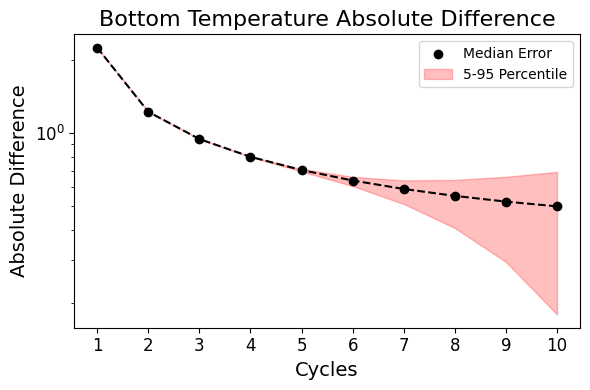

In [56]:
layer = 60

first_quartile_errs= np.quantile(T_frames_true_abs_diffs_field[:,:,layer], 0.05, axis=1)
median_errs= np.quantile(T_frames_true_abs_diffs_field[:,:,layer], 0.5, axis=1)
third_quartile_errs= np.quantile(T_frames_true_abs_diffs_field[:,:,layer], 0.95, axis=1)


plt.figure(figsize=(6,4))
plt.scatter(np.arange(1,T_frames_true.shape[0]), median_errs, c='k', zorder=3, label='Median Error')
plt.plot(np.arange(1,T_frames_true.shape[0]), median_errs, c='k', ls='--', zorder=3)

plt.fill_between(np.arange(1,T_frames_true.shape[0]),
                 first_quartile_errs, third_quartile_errs, color='r', alpha=0.25, label='5-95 Percentile')

plt.xticks(np.arange(1,T_frames_true.shape[0]), fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Cycles", fontsize=14)
plt.ylabel("Absolute Difference", fontsize=14)
plt.title("Bottom Temperature Absolute Difference", fontsize=16)
plt.yscale('log')
plt.legend()
plt.tight_layout()
plt.show()

Consider the distribution of all temperatures across the mesh for multiple cycles.

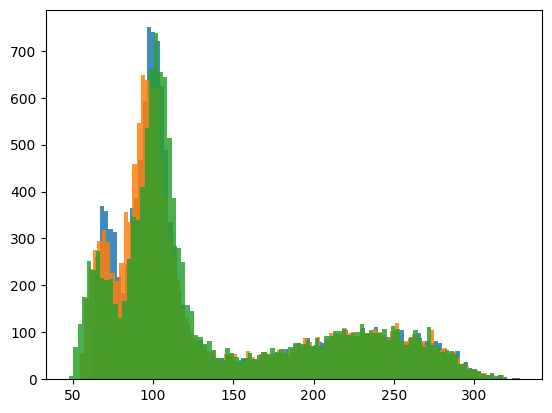

In [57]:
plt.hist(T_frames_true[0,:,0], bins=100, alpha=0.85)
plt.hist(T_frames_true[1,:,0], bins=100, alpha=0.85)
plt.hist(T_frames_true[-1,:,0], bins=100, alpha=0.85)
plt.show()

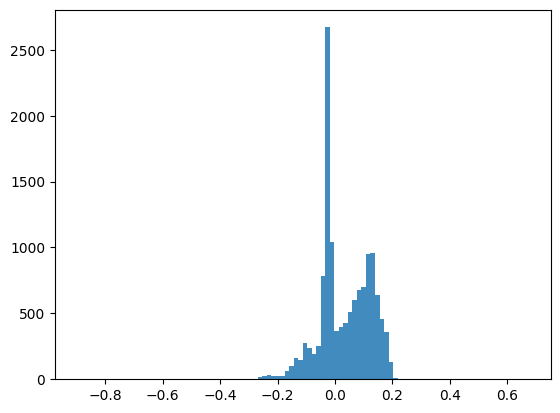

In [61]:
plt.hist((T_frames_true[-1,:,0] - T_frames_true[-2,:,0]), bins=100, alpha=0.85)
plt.show()

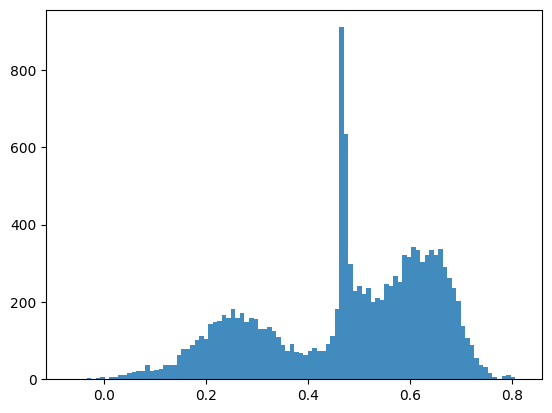

In [60]:
plt.hist((T_frames_true[-1,:,-1] - T_frames_true[-2,:,-1]), bins=100, alpha=0.85)
plt.show()

Compute relative difference between subsequent cycles in terms of the frobenius norm of the tensor containing temperature at each time step.

In [7]:
T_frames_true_diffs = []
for i in range(T_frames_true.shape[0]-1):
    T_frames_true_diffs.append(np.linalg.norm(T_frames_true[i+1] - T_frames_true[i], ord='fro') / np.linalg.norm(T_frames_true[i], ord='fro'))

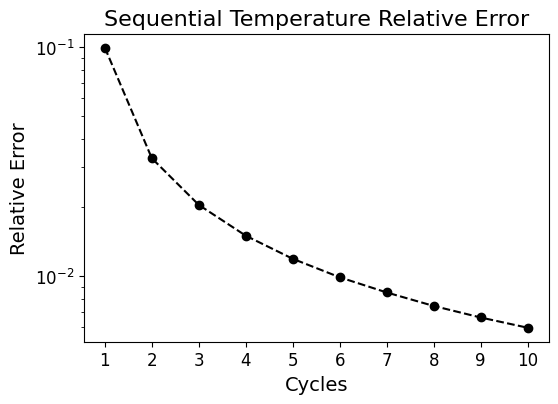

In [8]:
plt.figure(figsize=(6,4))
plt.scatter(np.arange(1,T_frames_true.shape[0]), T_frames_true_diffs, c='k')
plt.plot(np.arange(1,T_frames_true.shape[0]), T_frames_true_diffs, c='k', ls='--')

plt.xticks(np.arange(1,T_frames_true.shape[0]), fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Cycles", fontsize=14)
plt.ylabel("Relative Error", fontsize=14)
plt.title("Sequential Temperature Relative Error", fontsize=16)
plt.yscale('log')
plt.show()

Load the data from the first cycle only, and plot the temperature for a single triangle at multiple layers over the course of the cycle.

In [10]:
path = f'{mesh_dir}/results/true_2.5_80/T_frames_long'
T_frames_true_full_cycle = []
E_frames_true_full_cycle = []
for i in np.arange(0,2880,20):
    T_frames_true_full_cycle.append(np.load(path+"/T{:03d}.npy".format(i)))
    E_frames_true_full_cycle.append(np.load(path+"/E{:03d}.npy".format(i)))
T_frames_true_full_cycle = np.array(T_frames_true_full_cycle)
E_frames_true_full_cycle = np.array(E_frames_true_full_cycle)
T_frames_true_full_cycle.shape, E_frames_true_full_cycle.shape

((144, 13288, 61), (144, 13288))

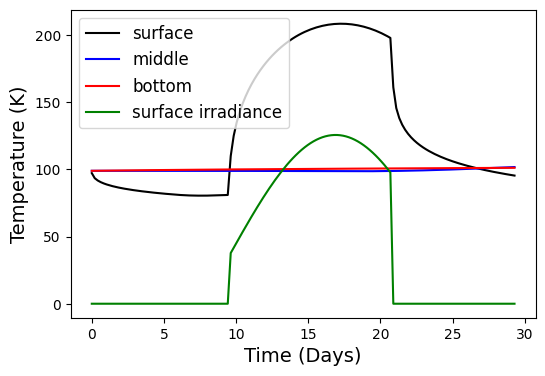

In [11]:
triangle = 0

plt.figure(figsize=(6,4))

time = np.arange(T_frames_true_full_cycle.shape[0])*0.20486111111
plt.plot(time,T_frames_true_full_cycle[:,triangle,0], c='k', label='surface')
plt.plot(time,T_frames_true_full_cycle[:,triangle,30], c='b', label='middle')
plt.plot(time,T_frames_true_full_cycle[:,triangle,60], c='r', label='bottom')

plt.plot(time, E_frames_true_full_cycle[:,triangle], color='g', label='surface irradiance')

plt.ylabel("Temperature (K)",fontsize=14)
plt.xlabel("Time (Days)",fontsize=14)
plt.legend(fontsize=12)
plt.show()